In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                       n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [4]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [5]:
# plt.figure(figsize=(10,6))
# plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

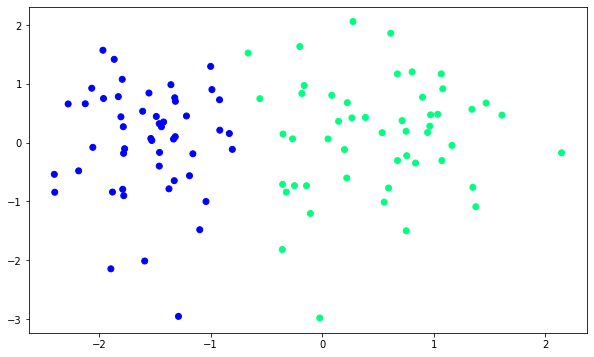

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

In [15]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [17]:
def step(z):
    return 1 if z>0 else 0

In [19]:
intercept_,coef_=perceptron(X,y)

In [20]:
print(coef_)
print(intercept_)

[1.27204247 0.06210803]
1.0


In [22]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [23]:
m

-20.481125724903155

In [24]:
b

-16.1009764023723

In [29]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

In [30]:
# plt.figure(figsize=(10,6))
# plt.plot(x_input,y_input,color='red',linewidth=3)
# plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# plt.ylim(-3,2)

(-3.0, 2.0)

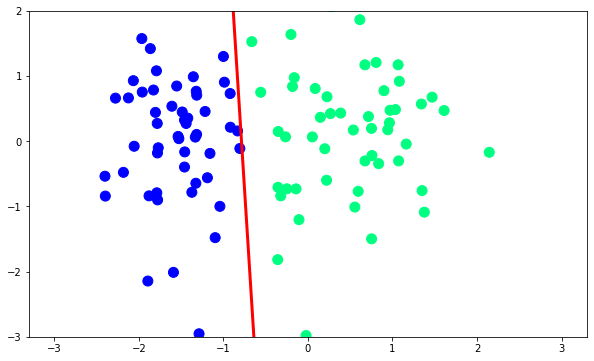

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [36]:
def perceptron(X,y):
    m=[]
    b=[]
    
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(200):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0])/weights[2])
    
    return m,b

In [38]:
m,b=perceptron(X,y)

In [40]:
from matplotlib.animation import FuncAnimation

In [41]:
import matplotlib.animation as animation

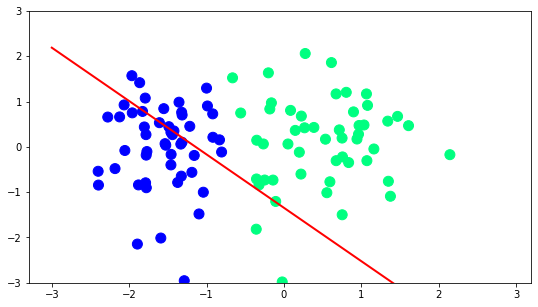

In [44]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [49]:
m=-(model.coef_[0][0]/model.coef_[0][1])
b=-(model.intercept_/model.coef_[0][1])

In [50]:
# x_input1 = np.linspace(-3,3,100)
# y_input1 = m*x_input + b

In [51]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input+b

In [54]:
y_input1

array([ 300.1362703 ,  292.4181008 ,  284.6999313 ,  276.98176181,
        269.26359231,  261.54542281,  253.82725332,  246.10908382,
        238.39091432,  230.67274482,  222.95457533,  215.23640583,
        207.51823633,  199.80006684,  192.08189734,  184.36372784,
        176.64555834,  168.92738885,  161.20921935,  153.49104985,
        145.77288036,  138.05471086,  130.33654136,  122.61837186,
        114.90020237,  107.18203287,   99.46386337,   91.74569388,
         84.02752438,   76.30935488,   68.59118538,   60.87301589,
         53.15484639,   45.43667689,   37.7185074 ,   30.0003379 ,
         22.2821684 ,   14.56399891,    6.84582941,   -0.87234009,
         -8.59050959,  -16.30867908,  -24.02684858,  -31.74501808,
        -39.46318757,  -47.18135707,  -54.89952657,  -62.61769607,
        -70.33586556,  -78.05403506,  -85.77220456,  -93.49037405,
       -101.20854355, -108.92671305, -116.64488255, -124.36305204,
       -132.08122154, -139.79939104, -147.51756053, -155.23573

In [55]:
# plt.figure(figsize=(10,6))
# plt.plot(x_input,y_input,color='red',linewidth=3)
# plt.plot(x_input1,y_input1,color='black',linewidth=3)
# plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# plt.ylim(-3,2)

(-3.0, 2.0)

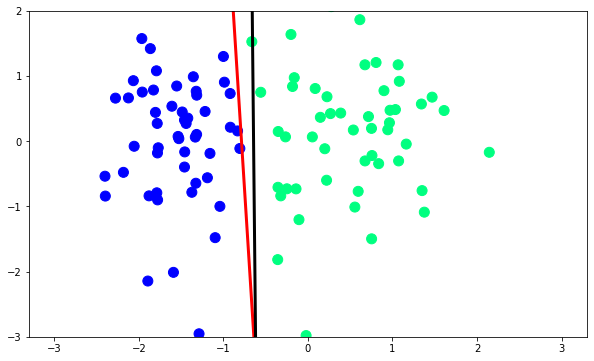

In [56]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)